<a href="https://colab.research.google.com/github/raj963/regration/blob/master/linearRigressionWithNumericalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [0]:
data = pd.read_csv('datasets/boston_data.csv', index_col=0)

In [7]:
data.head()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
ID,,,,,,,,,,,
1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [8]:
data.shape

(333, 11)

In [9]:
dir(data)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 11 columns):
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(8), int64(3)
memory usage: 31.2 KB


In [11]:
data.describe()

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


Text(1.6749999999999972, 0.5, 'median value of owner-occupied homes in $1000s.')

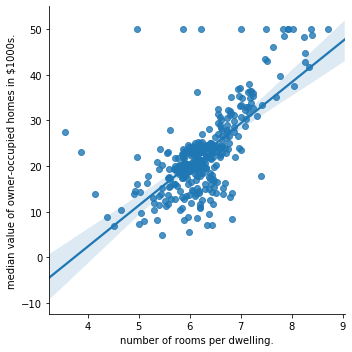

In [12]:
sns.lmplot('rm', 'medv', data)

plt.xlabel("number of rooms per dwelling.")
plt.ylabel("median value of owner-occupied homes in $1000s.")

Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $1000s')

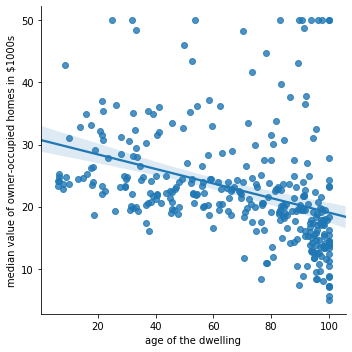

In [13]:
sns.lmplot('age', 'medv', data)

plt.xlabel("age of the dwelling")
plt.ylabel("median value of owner-occupied homes in $1000s")

Text(10.049999999999997, 0.5, 'median value of owner-occupied homes in $1000s.')

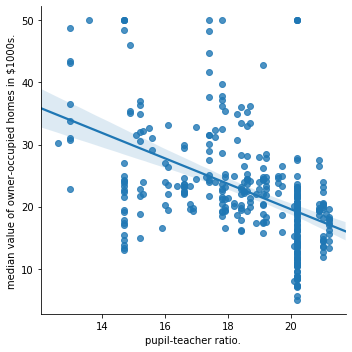

In [14]:
sns.lmplot('ptratio', 'medv', data)

plt.xlabel("pupil-teacher ratio.")
plt.ylabel("median value of owner-occupied homes in $1000s.")

In [15]:
correlation = data.corr()

correlation

,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
indus,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,0.614155,-0.473932
chas,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,-0.050055,0.204390
nox,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,0.598874,-0.413054
rm,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,-0.615747,0.689598
age,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,0.588834,-0.358888
dis,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,-0.505939,0.249422
rad,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,0.484568,-0.352251
tax,0.708313,-0.021826,0.670722,-0.356987,0.511893,-0.529539,0.903562,1.000000,0.467437,0.544485,-0.448078
ptratio,0.391087,-0.125067,0.192513,-0.366927,0.259293,-0.231101,0.470849,0.467437,1.000000,0.374802,-0.481376
lstat,0.614155,-0.050055,0.598874,-0.615747,0.588834,-0.505939,0.484568,0.544485,0.374802,1.000000,-0.738600


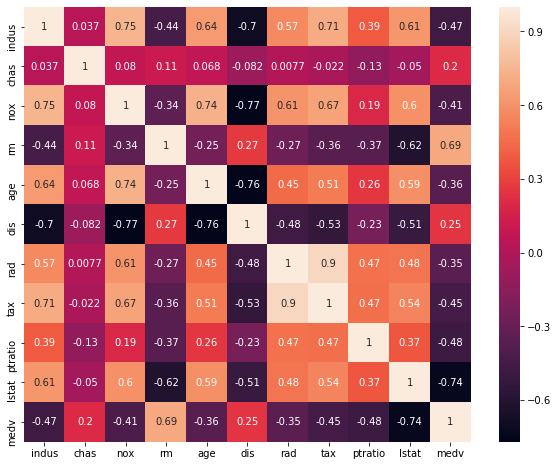

In [16]:
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)

plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('medv', axis=1)
Y = data['medv']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [19]:
x_train.shape, y_train.shape

((266, 10), (266,))

In [21]:
linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = linear_regression.predict(x_test)

y_pred

array([25.28659457, 28.57303764, 15.80275488, 12.97116825, 22.44697113,
       25.84170951, 27.20057539, 18.91085253, 26.19709511, 20.28276254,
       17.05969415, 25.26024706, 30.80682063, 37.12729863, 15.21833837,
       33.18291063, 22.39997261, 25.74162379, 25.0195504 , 23.98978558,
       19.38274011, 19.46275505, 19.28853185,  5.01746847, 15.82210828,
       22.75937428, 26.96913154, 38.0985833 , 24.05918381, 25.00816864,
       13.63516153, 34.8525424 , 35.85423056, 20.97640409, 23.95028738,
       12.39041715, 24.7975901 ,  7.0509203 , 20.81358851, 27.3221854 ,
       20.62258606, 26.08272627, 26.35831448, 20.23324227, 21.32142227,
       29.04746247, 26.02230689, 29.28581985, 22.02729511, 16.98962646,
       38.41999055, 23.37075991, 22.82358094, 17.87904935, 26.59608259,
       21.86379968, 15.70849358, 17.85231653, 30.24900233, 28.29020911,
       31.41839805, 43.12399696, 23.28794298, 17.72371626, 15.27274181,
       25.61612834, 25.90338823])

In [23]:
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})

df_y.sample(10)

,y_test,y_pred
ID,,
23,15.2,15.218338
434,14.3,18.910853
88,22.2,26.596083
102,26.5,26.022307
118,19.2,23.989786
461,16.4,19.288532
419,8.8,15.822108
263,48.8,38.419991
344,23.9,26.082726


In [24]:
print("Training score : ", linear_regression.score(x_train, y_train))

Training score :  0.7165238743004549


In [25]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing score : ", score)

Testing score :  0.6940069129106308


In [0]:
### Graph between predicted and actual values

### Graph between predicted and actual values

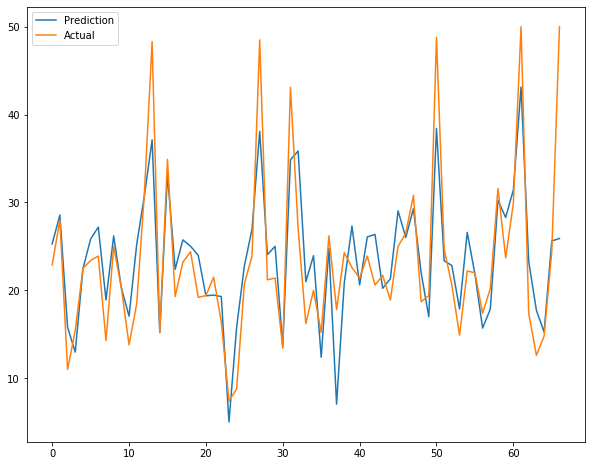

In [27]:
plt.subplots(figsize=(10,8))

plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")

plt.legend()

plt.show()

Ordinary least squares

In [0]:
import numpy as np
import statsmodels.api as sm

In [29]:
X = np.array(X)

X[:5]

array([[  2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,   4.09  ,
          1.    , 296.    ,  15.3   ,   4.98  ],
       [  7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,   4.9671,
          2.    , 242.    ,  17.8   ,   9.14  ],
       [  2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,   6.0622,
          3.    , 222.    ,  18.7   ,   2.94  ],
       [  2.18  ,   0.    ,   0.458 ,   7.147 ,  54.2   ,   6.0622,
          3.    , 222.    ,  18.7   ,   5.33  ],
       [  7.87  ,   0.    ,   0.524 ,   6.012 ,  66.6   ,   5.5605,
          5.    , 311.    ,  15.2   ,  12.43  ]])

In [30]:
X = np.array(X)

X[:5]

array([[  2.31  ,   0.    ,   0.538 ,   6.575 ,  65.2   ,   4.09  ,
          1.    , 296.    ,  15.3   ,   4.98  ],
       [  7.07  ,   0.    ,   0.469 ,   6.421 ,  78.9   ,   4.9671,
          2.    , 242.    ,  17.8   ,   9.14  ],
       [  2.18  ,   0.    ,   0.458 ,   6.998 ,  45.8   ,   6.0622,
          3.    , 222.    ,  18.7   ,   2.94  ],
       [  2.18  ,   0.    ,   0.458 ,   7.147 ,  54.2   ,   6.0622,
          3.    , 222.    ,  18.7   ,   5.33  ],
       [  7.87  ,   0.    ,   0.524 ,   6.012 ,  66.6   ,   5.5605,
          5.    , 311.    ,  15.2   ,  12.43  ]])

In [32]:
model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              685.8
Date:                Thu, 02 Jan 2020   Prob (F-statistic):                   7.35e-211
Time:                        19:21:51   Log-Likelihood:                         -1021.8
No. Observations:                 333   AIC:                                      2064.
Df Residuals:                     323   BIC:                                      2102.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0099      0.080     -0.123      0.902      -0.168       0.148
x2             4.3339      1.252      3.461      0.001       1.871       6.797
x3             0.5935      4.395      0.135      0.893      -8.053       9.240
x4             6.2482      0.401     15.591      0.000       5.460       7.037
x5            -0.0157      0.018     -0.858      0.391      -0.052       0.020
x6            -0.6503      0.250     -2.597      0.010      -1.143      -0.158
x7             0.0869      0.080      1.092      0.276      -0.070       0.244
x8            -0.0066      0.005     -1.385      0.167      -0.016       0.003
x9            -0.2626      0.130     -2.024      0.044      -0.518      -0.007
x10           -0.5386      0.065     -8.321      0.000      -0.666      -0.411
==============================================================================
Omnibus:                      141.333   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              757.422
Skew:                           1.709   Prob(JB):                    3.37e-165
Kurtosis:                       9.551   Cond. No.                     6.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""